In [357]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [358]:
train_df = pd.read_csv('../data/train/train.csv')
test_df = pd.read_csv('../data/test/test.csv')

In [359]:
print("train_df :", train_df.shape)
print("test_df :", test_df.shape)

train_df : (891, 12)
test_df : (418, 11)


In [360]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [361]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [362]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


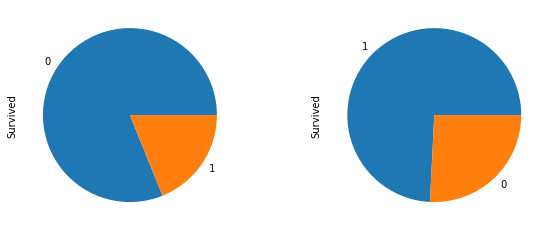

In [363]:
# is sex important feature? 
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)

train_df.Survived[train_df['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
train_df.Survived[train_df['Sex'] == 'female'].value_counts().plot(kind='pie')

In [364]:
# Age, Cabin, Embarked 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [365]:
# 1 : Pclass 
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [366]:
# One-Hot Encoding
train_pclass_dummies = pd.get_dummies(train_df['Pclass'], prefix='Pclass')
test_pclass_dummies = pd.get_dummies(test_df['Pclass'], prefix='Pclass')

train_df.drop('Pclass', axis=1, inplace=True)
test_df.drop('Pclass', axis=1, inplace=True)

train_df = train_df.join(train_pclass_dummies)
test_df = test_df.join(test_pclass_dummies)

In [367]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1


In [368]:
# 2 : Sex 
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [369]:
train_sex_dummies = pd.get_dummies(train_df['Sex'], prefix="Sex")
test_sex_dummies = pd.get_dummies(test_df['Sex'], prefix="Sex")

train_df.drop('Sex', axis=1, inplace=True)
test_df.drop('Sex', axis=1, inplace=True)

train_df = train_df.join(train_sex_dummies)
test_df = test_df.join(test_sex_dummies)

In [370]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,NaN,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,NaN,S,0,0,1,0,1


In [371]:
# 3 : Age 
train_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [372]:
train_df['Age'].isnull().sum()

177

In [373]:
# fill null value by median of the Age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [374]:
# 4 : Fare
train_df['Fare'].fillna(0, inplace=True)

In [375]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,NaN,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,NaN,S,0,0,1,0,1


In [376]:
train_df.drop('Cabin', axis=1, inplace=True)

In [377]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,S,0,0,1,0,1


In [378]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [379]:
train_df['Embarked'].isnull().sum()

2

In [380]:
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

In [381]:
train_embarked_dummies = pd.get_dummies(train_df['Embarked'], prefix="Embarked")
test_embarked_dummies = pd.get_dummies(test_df['Embarked'], prefix="Embarked")

train_df.drop('Embarked', axis=1, inplace=True)
test_df.drop('Embarked', axis=1, inplace=True)

train_df = train_df.join(train_embarked_dummies)
test_df = test_df.join(test_embarked_dummies)

In [382]:
train_df.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,13.019697,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [383]:
train_df.shape

(891, 13)

In [393]:
from sklearn.model_selection import train_test_split

In [320]:
X_train, X_test, y_train, y_test = train_test_split(train_df, survived, test_size=0.2)

In [321]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

rf_clf.score(X_train, y_train)

0.9803370786516854

In [322]:
# Logistic Regression
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

lr_reg.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8103932584269663

In [323]:
# SVM

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
svc.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8946629213483146

In [325]:
# Submission : Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

rf_clf.score(X_train, y_train)

0.9803370786516854

In [326]:
submission = pd.DataFrame({
    "PassengerId" : test_df["PassengerId"],
    "Survived" : y_pred
})

KeyError: 'PassengerId'

In [327]:
len(y_pred)

179

In [328]:
len(y_test)

179